In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
path="Travel-Insured-International_Custumers_Reviews.csv"

In [4]:
data = pd.read_csv(path)
data

,rate,title,content,review_date,Reviews,Sentiment
0,5,Better Than Thought,We purchased a travel plan from Travel Insured...,2025-02-14,Better Than Thought. We purchased a travel pla...,POSITIVE
1,5,Fortunately we didn’t have to use our…,Fortunately we didn’t have to use our travel i...,2024-11-25,Fortunately we didn’t have to use our travel i...,NEGATIVE
2,5,Insurance was easy to purchase,Insurance was easy to purchase online & gave m...,2024-11-01,Insurance was easy to purchase online & gave m...,NEGATIVE
3,5,Peace of mind,Isabel took care of our travel insurance needs...,2025-01-18,Peace of mind. Isabel took care of our travel ...,POSITIVE
4,5,ABC ruise coverage,Policy issued same day with good coverage expl...,2025-01-28,ABC ruise coverage. Policy issued same day wit...,NEGATIVE
...,...,...,...,...,...,...
895,1,TravelInsured.com - Avoid like the plague,I have a hard time believing that Travel insur...,2022-10-07,TravelInsured.com - Avoid like the plague. I h...,NEGATIVE
896,1,Still waiting almost seven months after…,Still waiting almost seven months after my VAL...,2022-06-04,Still waiting almost seven months after my VAL...,NEGATIVE
897,1,I sent in a claim on September 7th and…,I sent in a claim on September 7th and was fin...,2022-10-27,I sent in a claim on September 7th and was fin...,NEGATIVE
898,1,Don't believe all their promises,I have used them a lotThis is now the first ti...,2022-12-12,Don't believe all their promises. I have used ...,NEGATIVE


In [5]:
data.head(202)

,rate,title,content,review_date,Reviews,Sentiment
0,5,Better Than Thought,We purchased a travel plan from Travel Insured...,2025-02-14,Better Than Thought. We purchased a travel pla...,POSITIVE
1,5,Fortunately we didn’t have to use our…,Fortunately we didn’t have to use our travel i...,2024-11-25,Fortunately we didn’t have to use our travel i...,NEGATIVE
2,5,Insurance was easy to purchase,Insurance was easy to purchase online & gave m...,2024-11-01,Insurance was easy to purchase online & gave m...,NEGATIVE
3,5,Peace of mind,Isabel took care of our travel insurance needs...,2025-01-18,Peace of mind. Isabel took care of our travel ...,POSITIVE
4,5,ABC ruise coverage,Policy issued same day with good coverage expl...,2025-01-28,ABC ruise coverage. Policy issued same day wit...,NEGATIVE
...,...,...,...,...,...,...
197,5,Excellent service,NaN,2024-11-18,Excellent service,POSITIVE
198,4,Easy to set up,NaN,2024-11-16,Easy to set up,POSITIVE
199,5,👍👍👍👍,👍👍👍👍👍👍👍👍👍👍,2024-11-15,👍👍👍👍👍👍👍👍👍👍,NEGATIVE
200,1,"DON""T EVER DO BUSINESS WITH THIS COMPANY",DO NOT - DO NOT – DO NOT use this company for ...,2024-05-17,"DON""T EVER DO BUSINESS WITH THIS COMPANY. DO N...",NEGATIVE


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rate         900 non-null    int64 
 1   title        900 non-null    object
 2   content      839 non-null    object
 3   review_date  900 non-null    object
 4   Reviews      900 non-null    object
 5   Sentiment    900 non-null    object
dtypes: int64(1), object(5)
memory usage: 42.3+ KB


In [7]:
data.describe()

,rate
count,900.000000
mean,4.271111
std,1.325647
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
data.isnull().sum()

rate            0
title           0
content        61
review_date     0
Reviews         0
Sentiment       0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

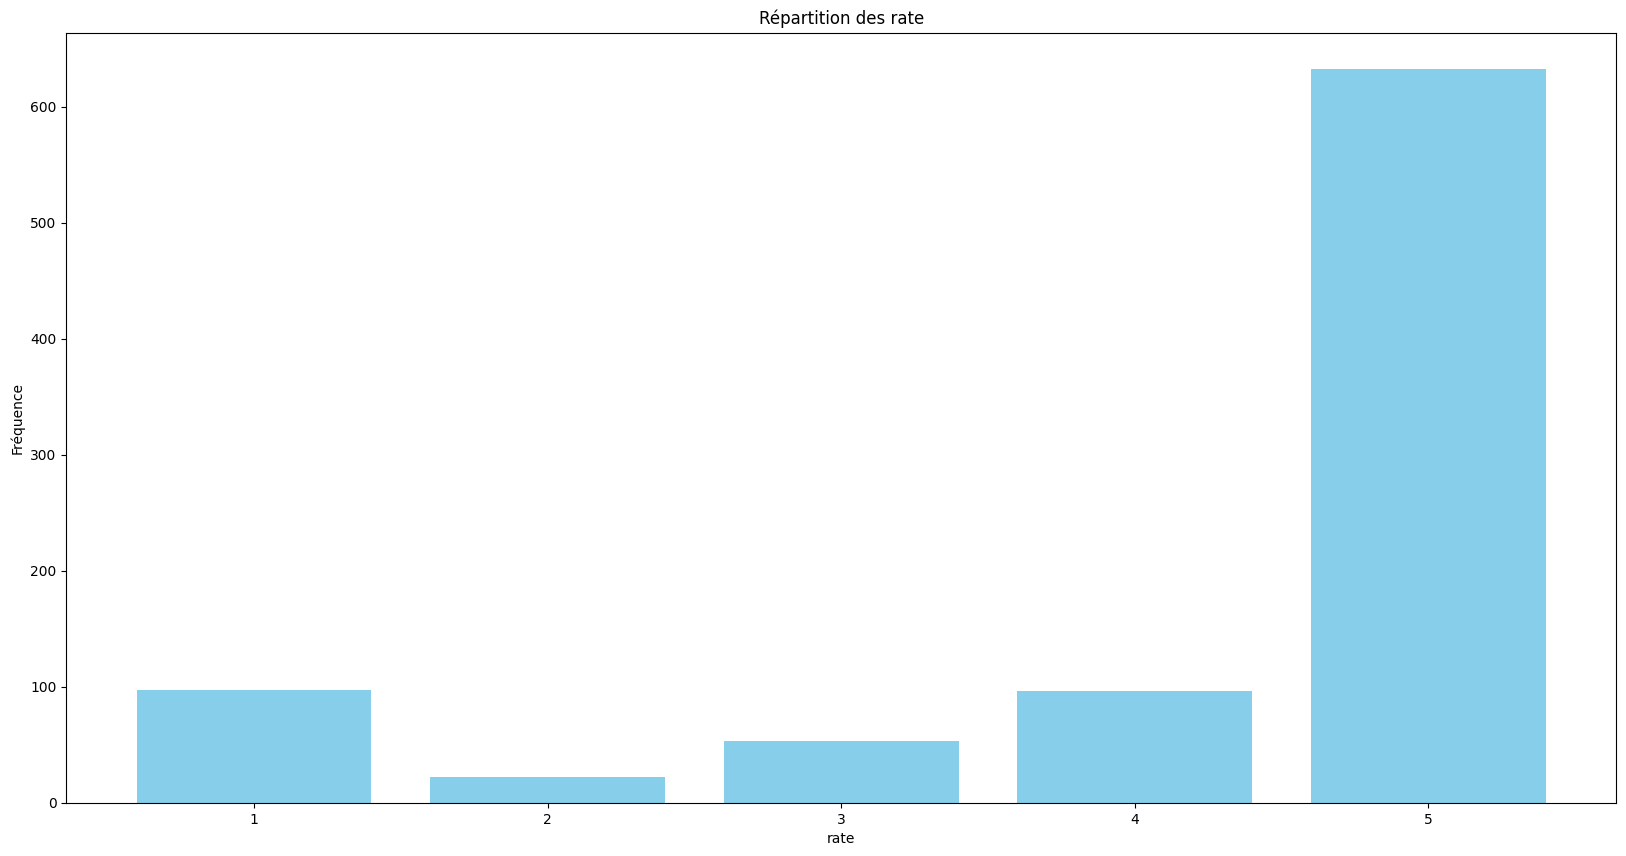

In [10]:
class_counts = data['rate'].value_counts()
plt.figure(figsize=(20, 10))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('rate')
plt.ylabel('Fréquence')
plt.title('Répartition des rate')
plt.show()




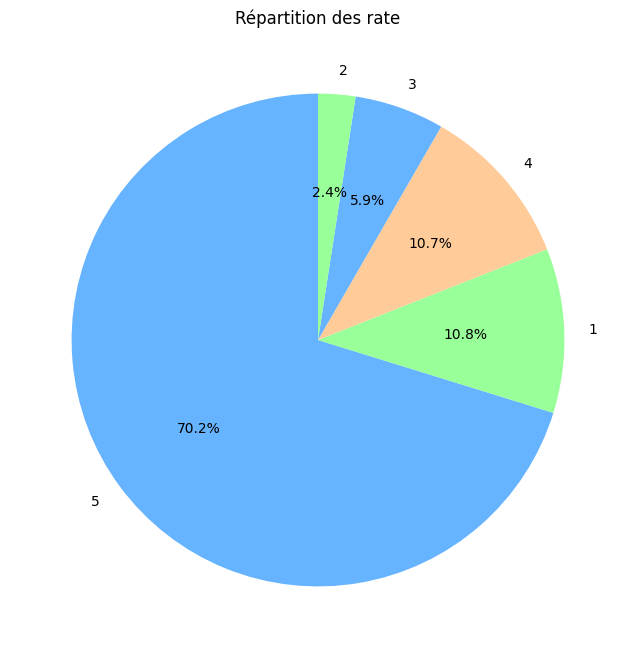

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Répartition des rate')
plt.show()


In [12]:
# Remplacer les valeurs manquantes de 'content' par le contenu de 'title'
data['content'].fillna(data['title'], inplace=True)

# Vérification pour s'assurer qu'il n'y a plus de valeurs manquantes dans 'content'
print(data['content'].isnull().sum())


0


C:\Users\Stephane\AppData\Local\Temp\ipykernel_12396\1674084512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['content'].fillna(data['title'], inplace=True)


In [13]:
data.isnull().sum()

rate           0
title          0
content        0
review_date    0
Reviews        0
Sentiment      0
dtype: int64

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Conversion en minuscules
    text = text.lower()
    # Suppression des chiffres
    text = re.sub(r'\d+', '', text)
# Suppression des stop words et lemmatisation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Convertir toutes les valeurs en chaînes de caractères
data['title'] = data['title'].astype(str)
data['content'] = data['content'].astype(str)
data['Reviews'] = data['Reviews'].astype(str)

# Appliquer le nettoyage sur les colonnes title et content
data['title'] = data['title'].apply(clean_text)
data['content'] = data['content'].apply(clean_text)
data['Reviews'] = data['Reviews'].apply(clean_text)

In [15]:
data

,rate,title,content,review_date,Reviews,Sentiment
0,5,better thought,purchased travel plan travel insured internati...,2025-02-14,better thought. purchased travel plan travel i...,POSITIVE
1,5,fortunately didn’t use our…,fortunately didn’t use travel insurance gave u...,2024-11-25,fortunately didn’t use travel insurance gave u...,NEGATIVE
2,5,insurance easy purchase,insurance easy purchase online & gave coverage...,2024-11-01,insurance easy purchase online & gave coverage...,NEGATIVE
3,5,peace mind,isabel took care travel insurance needs. broug...,2025-01-18,peace mind. isabel took care travel insurance ...,POSITIVE
4,5,abc ruise coverage,policy issued day good coverage explanations. ...,2025-01-28,abc ruise coverage. policy issued day good cov...,NEGATIVE
...,...,...,...,...,...,...
895,1,travelinsured.com - avoid like plague,hard time believing travel insured continues t...,2022-10-07,travelinsured.com - avoid like plague. hard ti...,NEGATIVE
896,1,still waiting almost seven month after…,still waiting almost seven month valid claim s...,2022-06-04,still waiting almost seven month valid claim s...,NEGATIVE
897,1,sent claim september th and…,sent claim september th finally posted receive...,2022-10-27,sent claim september th finally posted receive...,NEGATIVE
898,1,believe promise,used lotthis first time filing claimand waitin...,2022-12-12,believe promises. used lotthis first time fili...,NEGATIVE


In [16]:
data['title_length'] = data['title'].apply(lambda x: len(x.split()))
data['content_length'] = data['content'].apply(lambda x: len(x.split()))
data['Reviews_length'] = data['Reviews'].apply(lambda x: len(x.split()))

print(data['title_length'].describe())
print(data['content_length'].describe())
print(data['Reviews_length'].describe())



count    900.000000
mean       3.220000
std        1.354119
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       13.000000
Name: title_length, dtype: float64
count    900.000000
mean      16.684444
std       22.793809
min        1.000000
25%        6.000000
50%       11.000000
75%       19.250000
max      316.000000
Name: content_length, dtype: float64
count    900.000000
mean      18.057778
std       23.492905
min        1.000000
25%        7.000000
50%       12.000000
75%       21.000000
max      321.000000
Name: Reviews_length, dtype: float64


C:\Users\Stephane\AppData\Local\Temp\ipykernel_12396\2494309858.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['title_length'], bins=30, color='blue')


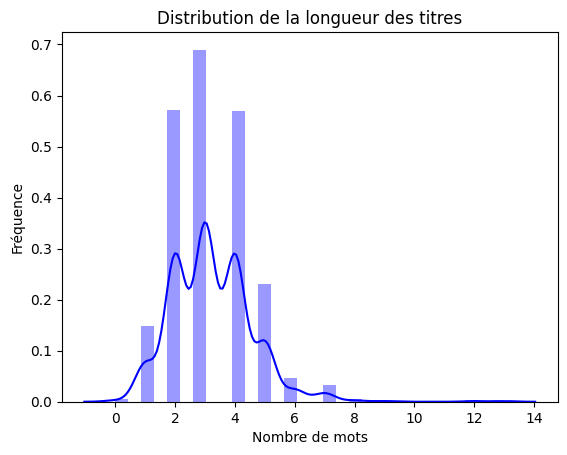

C:\Users\Stephane\AppData\Local\Temp\ipykernel_12396\2494309858.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['content_length'], bins=30, color='green')


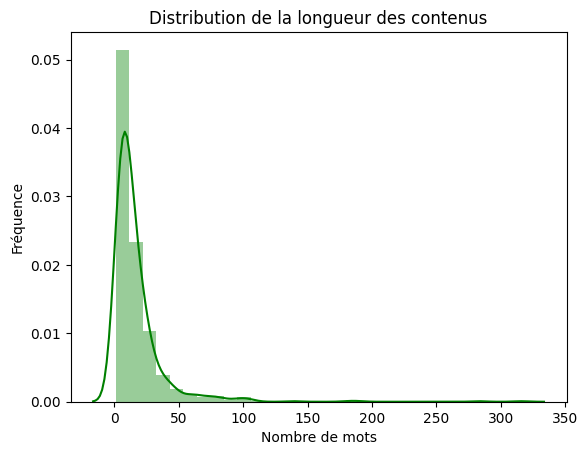

C:\Users\Stephane\AppData\Local\Temp\ipykernel_12396\2494309858.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Reviews_length'], bins=30, color='black')


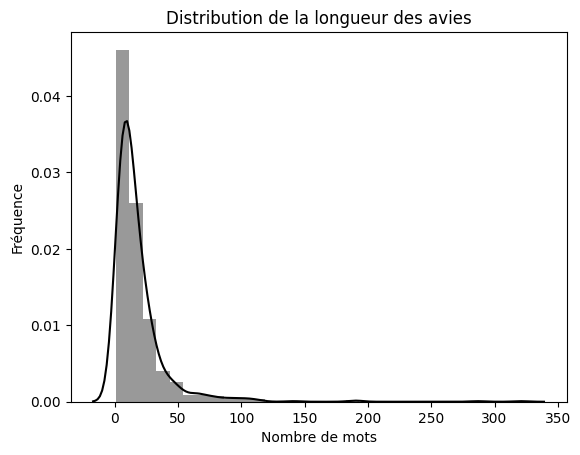

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
# Distribution de la longueur des titres
sns.distplot(data['title_length'], bins=30, color='blue')
plt.title('Distribution de la longueur des titres')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()

# Distribution de la longueur des contenus
sns.distplot(data['content_length'], bins=30, color='green')
plt.title('Distribution de la longueur des contenus')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()

# Distribution de la longueur des avies
sns.distplot(data['Reviews_length'], bins=30, color='black')
plt.title('Distribution de la longueur des avies')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()


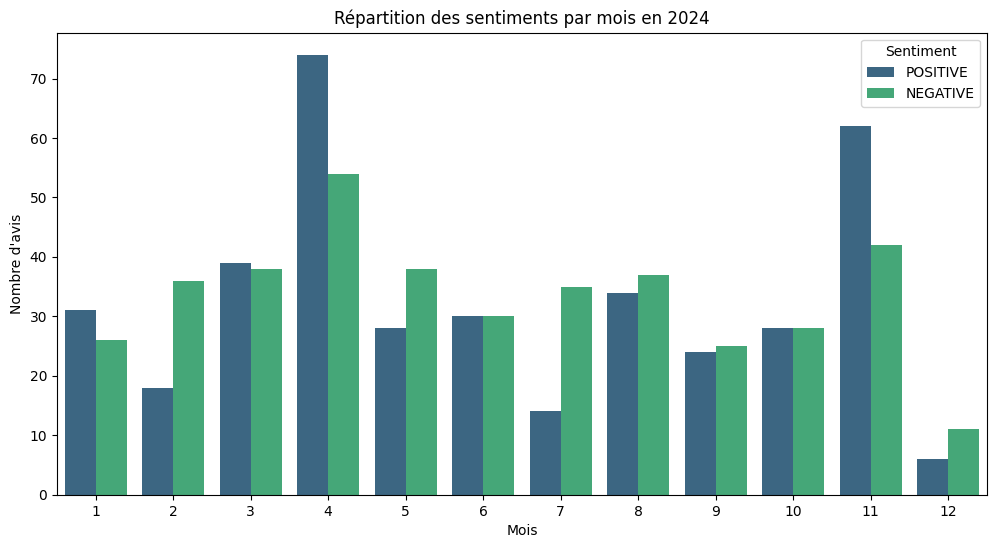

In [18]:


# Assurer que la colonne "Date" est de type datetime
data['review_date'] = pd.to_datetime(data['review_date'])

# Extraire l'année et le mois de la date
data['Year'] = data['review_date'].dt.year
data['Month'] = data['review_date'].dt.month

# Filtrer uniquement les données de 2024
data_2024 = data[data['Year'] == 2024]

# Visualiser la répartition des sentiments par mois
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=data_2024, palette='viridis')
plt.title("Répartition des sentiments par mois en 2024")
plt.xlabel("Mois")
plt.ylabel("Nombre d'avis")
plt.show()


In [19]:
from nltk.tokenize import word_tokenize

# Fonction pour tokeniser chaque ligne
def tokenize_text(text):
    return word_tokenize(text.lower())  # Convertir en minuscule et tokeniser

# Appliquer la tokenization à la colonne "Review"
data['tokens'] = data['Reviews'].apply(tokenize_text)


In [20]:
data

,rate,title,content,review_date,Reviews,Sentiment,title_length,content_length,Reviews_length,Year,Month,tokens
0,5,better thought,purchased travel plan travel insured internati...,2025-02-14,better thought. purchased travel plan travel i...,POSITIVE,2,44,46,2025,2,"[better, thought, ., purchased, travel, plan, ..."
1,5,fortunately didn’t use our…,fortunately didn’t use travel insurance gave u...,2024-11-25,fortunately didn’t use travel insurance gave u...,NEGATIVE,4,11,11,2024,11,"[fortunately, didn, ’, t, use, travel, insuran..."
2,5,insurance easy purchase,insurance easy purchase online & gave coverage...,2024-11-01,insurance easy purchase online & gave coverage...,NEGATIVE,3,11,11,2024,11,"[insurance, easy, purchase, online, &, gave, c..."
3,5,peace mind,isabel took care travel insurance needs. broug...,2025-01-18,peace mind. isabel took care travel insurance ...,POSITIVE,2,16,18,2025,1,"[peace, mind, ., isabel, took, care, travel, i..."
4,5,abc ruise coverage,policy issued day good coverage explanations. ...,2025-01-28,abc ruise coverage. policy issued day good cov...,NEGATIVE,3,21,24,2025,1,"[abc, ruise, coverage, ., policy, issued, day,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
895,1,travelinsured.com - avoid like plague,hard time believing travel insured continues t...,2022-10-07,travelinsured.com - avoid like plague. hard ti...,NEGATIVE,5,49,54,2022,10,"[travelinsured.com, -, avoid, like, plague, .,..."
896,1,still waiting almost seven month after…,still waiting almost seven month valid claim s...,2022-06-04,still waiting almost seven month valid claim s...,NEGATIVE,6,35,35,2022,6,"[still, waiting, almost, seven, month, valid, ..."
897,1,sent claim september th and…,sent claim september th finally posted receive...,2022-10-27,sent claim september th finally posted receive...,NEGATIVE,5,33,33,2022,10,"[sent, claim, september, th, finally, posted, ..."
898,1,believe promise,used lotthis first time filing claimand waitin...,2022-12-12,believe promises. used lotthis first time fili...,NEGATIVE,2,25,27,2022,12,"[believe, promises, ., used, lotthis, first, t..."


In [21]:
from collections import Counter

# Créer une fonction pour obtenir les mots les plus fréquents pour chaque mois
def get_top_words_by_month(data, month):
    # Filtrer les données pour le mois donné
    data_month = data[data['Month'] == month]
    
    # Rassembler tous les mots tokenisés dans une liste
    all_words = [word for tokens in data_month['tokens'] for word in tokens]
    
    # Compter les fréquences des mots
    word_freq = Counter(all_words)
    
    # Obtenir les 20 mots les plus fréquents
    top_words = word_freq.most_common(20)
    
    # Retourner les résultats
    return top_words

# Exemple: obtenir les mots les plus fréquents pour janvier (mois 1)
top_words_january = get_top_words_by_month(data, 1)

# Afficher les résultats
print(top_words_january)


[('.', 198), (',', 71), ('insurance', 39), ('claim', 35), ('travel', 33), ('trip', 32), ('coverage', 21), ('service', 16), ('’', 15), ('insured', 15), ('mind', 14), ('good', 14), ('flight', 14), ('needed', 14), ('use', 14), ('customer', 12), ('peace', 11), ('time', 11), ('company', 11), ('easy', 11)]


C:\Users\Stephane\AppData\Local\Temp\ipykernel_12396\1626370027.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


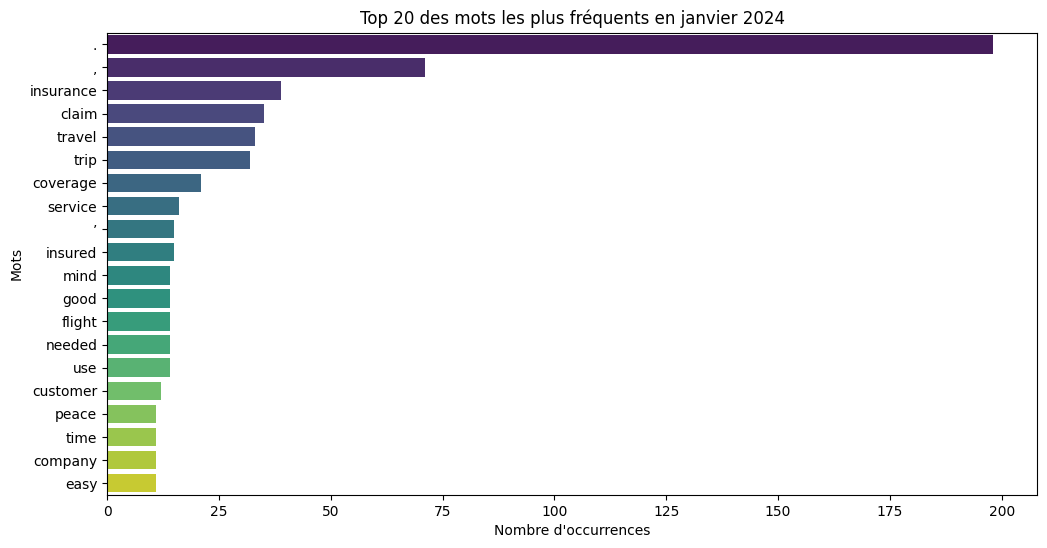

In [22]:
# Extraire les mots et les fréquences
words, counts = zip(*top_words_january)

# Créer un graphique des mots les plus fréquents pour janvier
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Mots")
plt.title("Top 20 des mots les plus fréquents en janvier 2024")
plt.show()


In [23]:
# Initialisation du lemmatizer et des stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Stopwords en anglais

# Fonction de lemmatisation
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]

# Appliquer la lemmatisation
data['lemmatized_tokens'] = data['tokens'].apply(lemmatize_tokens)

# Aperçu des résultats
data[['tokens', 'lemmatized_tokens']].head()


,tokens,lemmatized_tokens
0,"[better, thought, ., purchased, travel, plan, ...","[better, thought, purchased, travel, plan, tra..."
1,"[fortunately, didn, ’, t, use, travel, insuran...","[fortunately, use, travel, insurance, gave, u,..."
2,"[insurance, easy, purchase, online, &, gave, c...","[insurance, easy, purchase, online, gave, cove..."
3,"[peace, mind, ., isabel, took, care, travel, i...","[peace, mind, isabel, took, care, travel, insu..."
4,"[abc, ruise, coverage, ., policy, issued, day,...","[abc, ruise, coverage, policy, issued, day, go..."


C:\Users\Stephane\AppData\Local\Temp\ipykernel_12396\2383430634.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


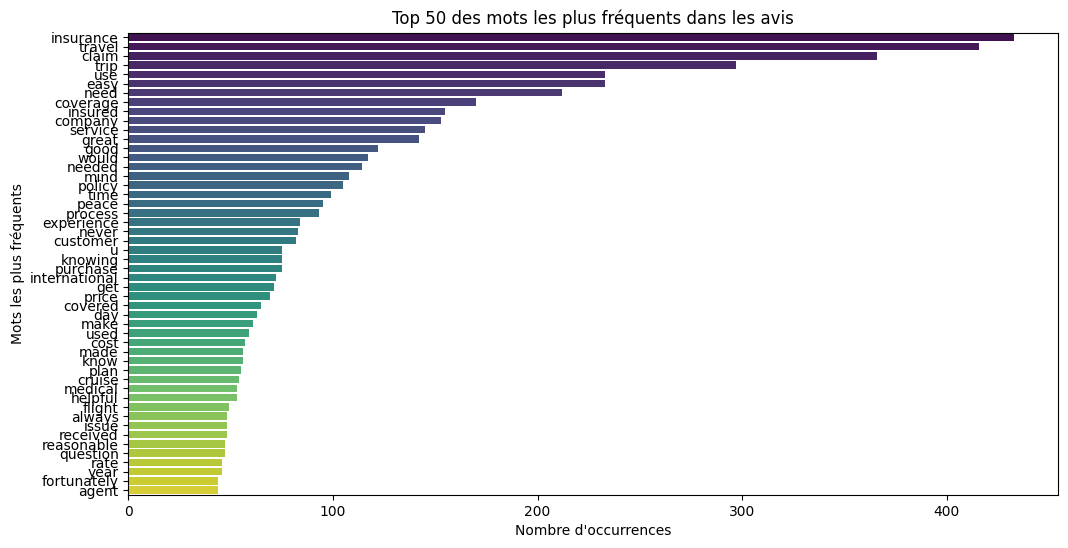

In [24]:
from collections import Counter
# Compter les fréquences des mots dans toute la colonne "lemmatized_tokens"
all_words = [word for tokens in data['lemmatized_tokens'] for word in tokens]
word_freq = Counter(all_words)

# Obtenir les 50 mots les plus fréquents
top_words = word_freq.most_common(50)
words, counts = zip(*top_words)

# Créer un graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Mots les plus fréquents")
plt.title("Top 50 des mots les plus fréquents dans les avis")
plt.show()


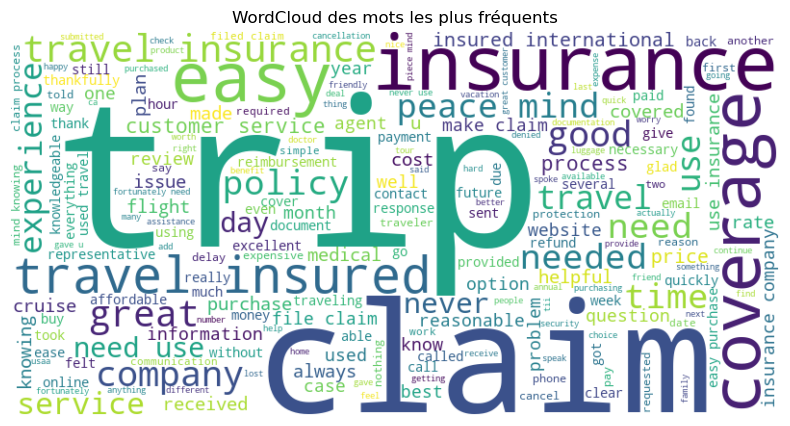

In [24]:
from collections import Counter
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud des mots les plus fréquents")
plt.show()
